<a href="https://colab.research.google.com/github/ana-garcia1/C-mulos/blob/main/Graficos_Espectros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
#Primero se importan las librerías necesarias para trabajar
import numpy as np
import matplotlib.pyplot as plt
import random
import math
#import seaborn as sns
#sns.set()
import scipy.stats as st
#from jupyterthemes import jtplot
#jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False)

from astropy.io import ascii
from specutils import Spectrum1D
from astropy import units as u

In [87]:
# Se importan los datos
#L41     = np.genfromtxt('L41.dat')
Alessi18   = np.genfromtxt('Alessi18.dat')
Archinal1  = np.genfromtxt('Archinal1.dat')
Berkeley82 = np.genfromtxt('Be82.dat')
ESO312_04  = np.genfromtxt('ESO312_04.dat')
ESO430_09  = np.genfromtxt('ESO430_09.dat')
ESO435_48  = np.genfromtxt('ESO435_48.dat')
ESO445_74  = np.genfromtxt('ESO445_74.dat')
ESO518_03  = np.genfromtxt('ESO518_03.dat')
NGC6204    = np.genfromtxt('NGC6204.dat')
vdBH92     = np.genfromtxt('BH92.dat')

LB = np.genfromtxt('Lineas-Balmer')

In [88]:
# Crear una lista de espectros para facilitar el procesamiento
spectra = {
    "Alessi18": Alessi18,
    "Archinal1": Archinal1,
    "Berkeley82": Berkeley82,
    "ESO312_04": ESO312_04,
    "ESO430_09": ESO430_09,
    "ESO435_48": ESO435_48,
    "ESO445_74": ESO445_74,
    "ESO518_03": ESO518_03,
    "NGC6204": NGC6204,
    "vdBH92": vdBH92,
}

In [89]:
# Normalizar los espectros en una longitud de onda específica
normalized_spectra = {}  # Diccionario para almacenar los espectros normalizados
reference_wavelength = 5400 * u.AA  # Longitud de onda de referencia para normalizar (con unidades)

for name, data in spectra.items():
    wavelength = data[:, 0] * u.AA  # Primera columna: longitud de onda (convertida a Quantity)
    flux = data[:, 1] * u.erg / u.s / u.cm**2 / u.AA  # Segunda columna: flujo (convertida a Quantity)

    # Crear el objeto Spectrum1D
    spectrum = Spectrum1D(spectral_axis=wavelength, flux=flux)

    # Encontrar el valor del flujo en la longitud de onda de referencia
    idx = np.argmin(np.abs(spectrum.spectral_axis - reference_wavelength))
    reference_flux = spectrum.flux[idx]

    # Normalizar el espectro dividiendo por el flujo de referencia
    normalized_flux = spectrum.flux / reference_flux
    normalized_spectrum = Spectrum1D(spectral_axis=spectrum.spectral_axis, flux=normalized_flux)

    # Almacenar el espectro normalizado en el diccionario
    normalized_spectra[name] = normalized_spectrum

# Ahora puedes trabajar con los espectros normalizados en memoria
# Por ejemplo, acceder al espectro normalizado de "Alessi18":
alessi18_normalized = normalized_spectra["Alessi18"]
print("Longitud de onda de Alessi18 normalizado:", alessi18_normalized.spectral_axis)
print("Flujo de Alessi18 normalizado:", alessi18_normalized.flux)

Longitud de onda de Alessi18 normalizado: [3700.   3703.43 3706.86 3710.29 3713.72 3717.15 3720.58 3724.   3727.43
 3730.86 3734.29 3737.72 3741.15 3744.58 3748.01 3751.44 3754.87 3758.3
 3761.73 3765.15 3768.58 3772.01 3775.44 3778.87 3782.3  3785.73 3789.16
 3792.59 3796.02 3799.45 3802.88 3806.31 3809.73 3813.16 3816.59 3820.02
 3823.45 3826.88 3830.31 3833.74 3837.17 3840.6  3844.03 3847.46 3850.88
 3854.31 3857.74 3861.17 3864.6  3868.03 3871.46 3874.89 3878.32 3881.75
 3885.18 3888.61 3892.04 3895.46 3898.89 3902.32 3905.75 3909.18 3912.61
 3916.04 3919.47 3922.9  3926.33 3929.76 3933.19 3936.62 3940.04 3943.47
 3946.9  3950.33 3953.76 3957.19 3960.62 3964.05 3967.48 3970.91 3974.34
 3977.77 3981.19 3984.62 3988.05 3991.48 3994.91 3998.34 4001.77 4005.2
 4008.63 4012.06 4015.49 4018.92 4022.35 4025.77 4029.2  4032.63 4036.06
 4039.49 4042.92 4046.35 4049.78 4053.21 4056.64 4060.07 4063.5  4066.92
 4070.35 4073.78 4077.21 4080.64 4084.07 4087.5  4090.93 4094.36 4097.79
 4101.22 41

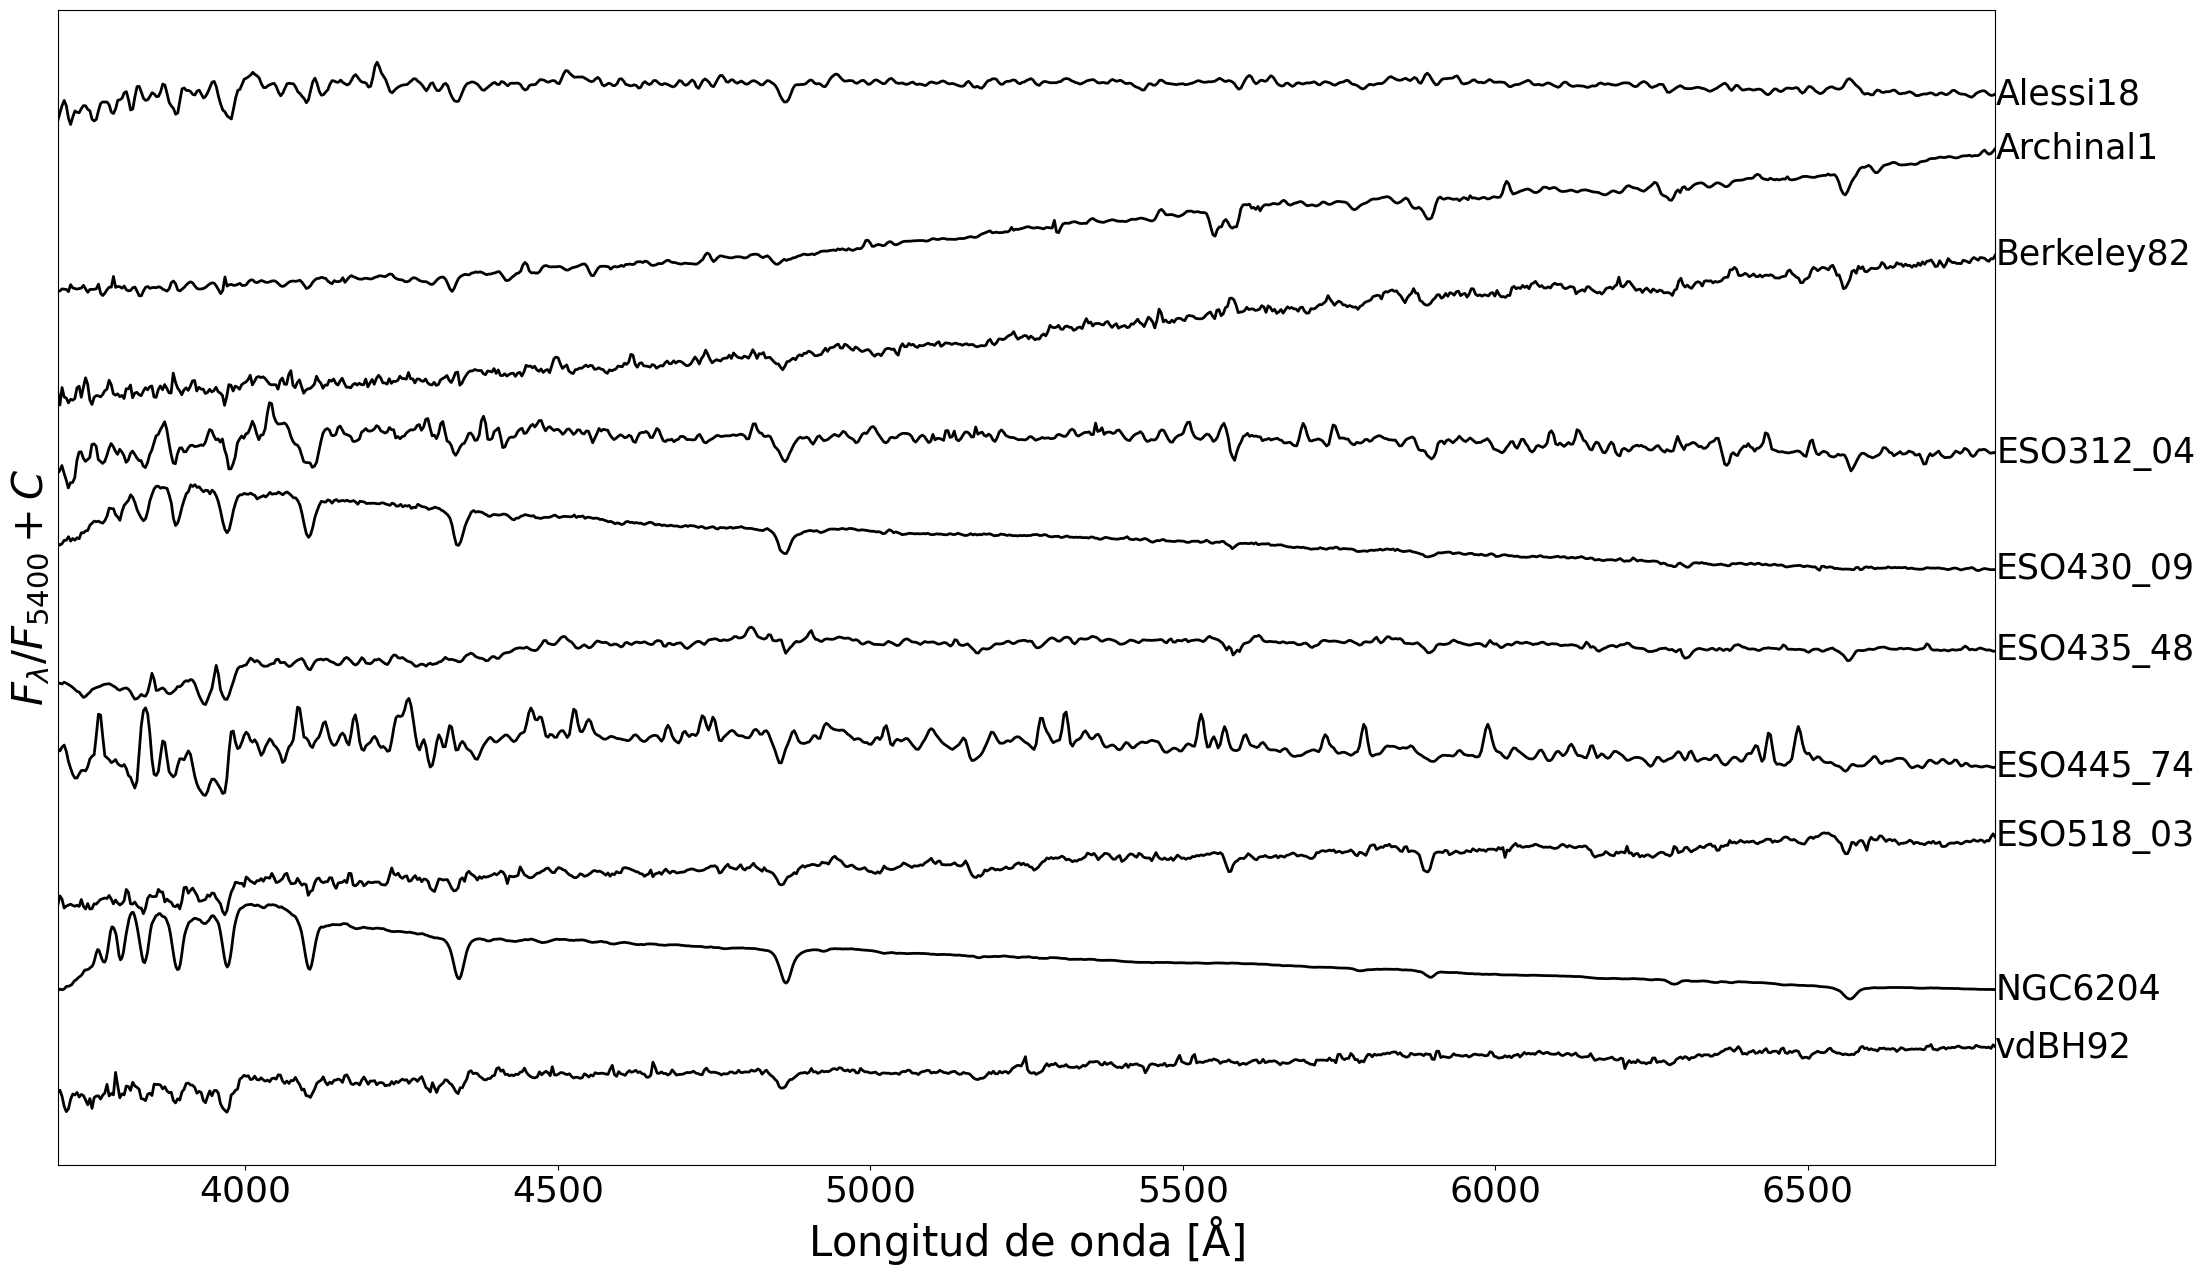

In [108]:

#Se grafican los espectros

#plt.title('Espectros finales')
#plt.style.use('dark_background')
plt.figure(figsize=(25,15), facecolor= 'white')
ax = plt.axes()
ax.set_facecolor('white')
ax.tick_params(axis= 'x', colors='black')
ax.tick_params(axis= 'y', colors='black')


plt.ylabel('$F_{\lambda}/F_{5400} +C$', color= 'black',fontsize=30)
plt.xlabel('Longitud de onda [$\\mathrm{\\AA}$]', color='black', fontsize=30)
plt.xlim(3700,6800)
plt.yticks([])
plt.xticks(fontsize=26, color='black')
#plt.ylim()

y_offset = 0.0  # Desplazamiento inicial en el eje y

for name, spectrum in normalized_spectra.items():
    # Graficar el espectro
    if name=='Alessi18':
      plt.plot(spectrum.spectral_axis.value, spectrum.flux.value + y_offset+0.5, label=name, c='black', lw=2)

          # Agregar el nombre del espectro como etiqueta en la curva
      x_label = spectrum.spectral_axis[-1].value  # Posición x: final de la curva (sin unidades)
      y_label = spectrum.flux[-1].value + y_offset  # Posición y: final de la curva + desplazamiento (sin unidades)
      plt.text(x_label, y_label+0.5, name, fontsize=25, verticalalignment='center')

      y_offset += -1.1  # Incrementar el desplazamiento para el siguiente espectro

    else:
      plt.plot(spectrum.spectral_axis.value, spectrum.flux.value + y_offset, label=name, c='black', lw=2)

      # Agregar el nombre del espectro como etiqueta en la curva
      x_label = spectrum.spectral_axis[-1].value  # Posición x: final de la curva (sin unidades)
      y_label = spectrum.flux[-1].value + y_offset  # Posición y: final de la curva + desplazamiento (sin unidades)
      plt.text(x_label, y_label, name, fontsize=25, verticalalignment='center')

      y_offset += -1.2  # Incrementar el desplazamiento para el siguiente espectro


#plt.scatter(LBx,LBy, color= 'black', marker= '|')

#plt.text(4070,-16, 'H$\delta$', fontsize=24)
#plt.text(4315,-16, 'H$\gamma$', fontsize=24)
#plt.text(4825,-16, r'H$\beta$', fontsize=24)
#plt.text(6535,-16, r'H$\alpha$', fontsize=24)

plt.savefig('Espectros_10CA.png')

plt.show()


In [31]:
nx1 = Alessi18[:,0]
y1 = Alessi18[:,1]

x2 = Archinal1[:,0]
y2 = Archinal1[:,1]

x3 = Berkeley82[:,0]
y3 = Berkeley82[:,1]

x4 = ESO312_04[:,0]
y4 = ESO312_04[:,1]

x5 = ESO430_09[:,0]
y5 = ESO430_09[:,1]

x6 = ESO435_48[:,0]
y6 = ESO435_48[:,1]

x7 = ESO445_74[:,0]
y7 = ESO445_74[:,1]

x8 = ESO518_03[:,0]
y8 = ESO518_03[:,1]

x9 = NGC6204[:,0]
y9 = (NGC6204[:,1])/37.4

x10 = vdBH92[:,0]
y10= vdBH92[:,1]

LBx = LB[:,0]
LBy = LB[:,1]

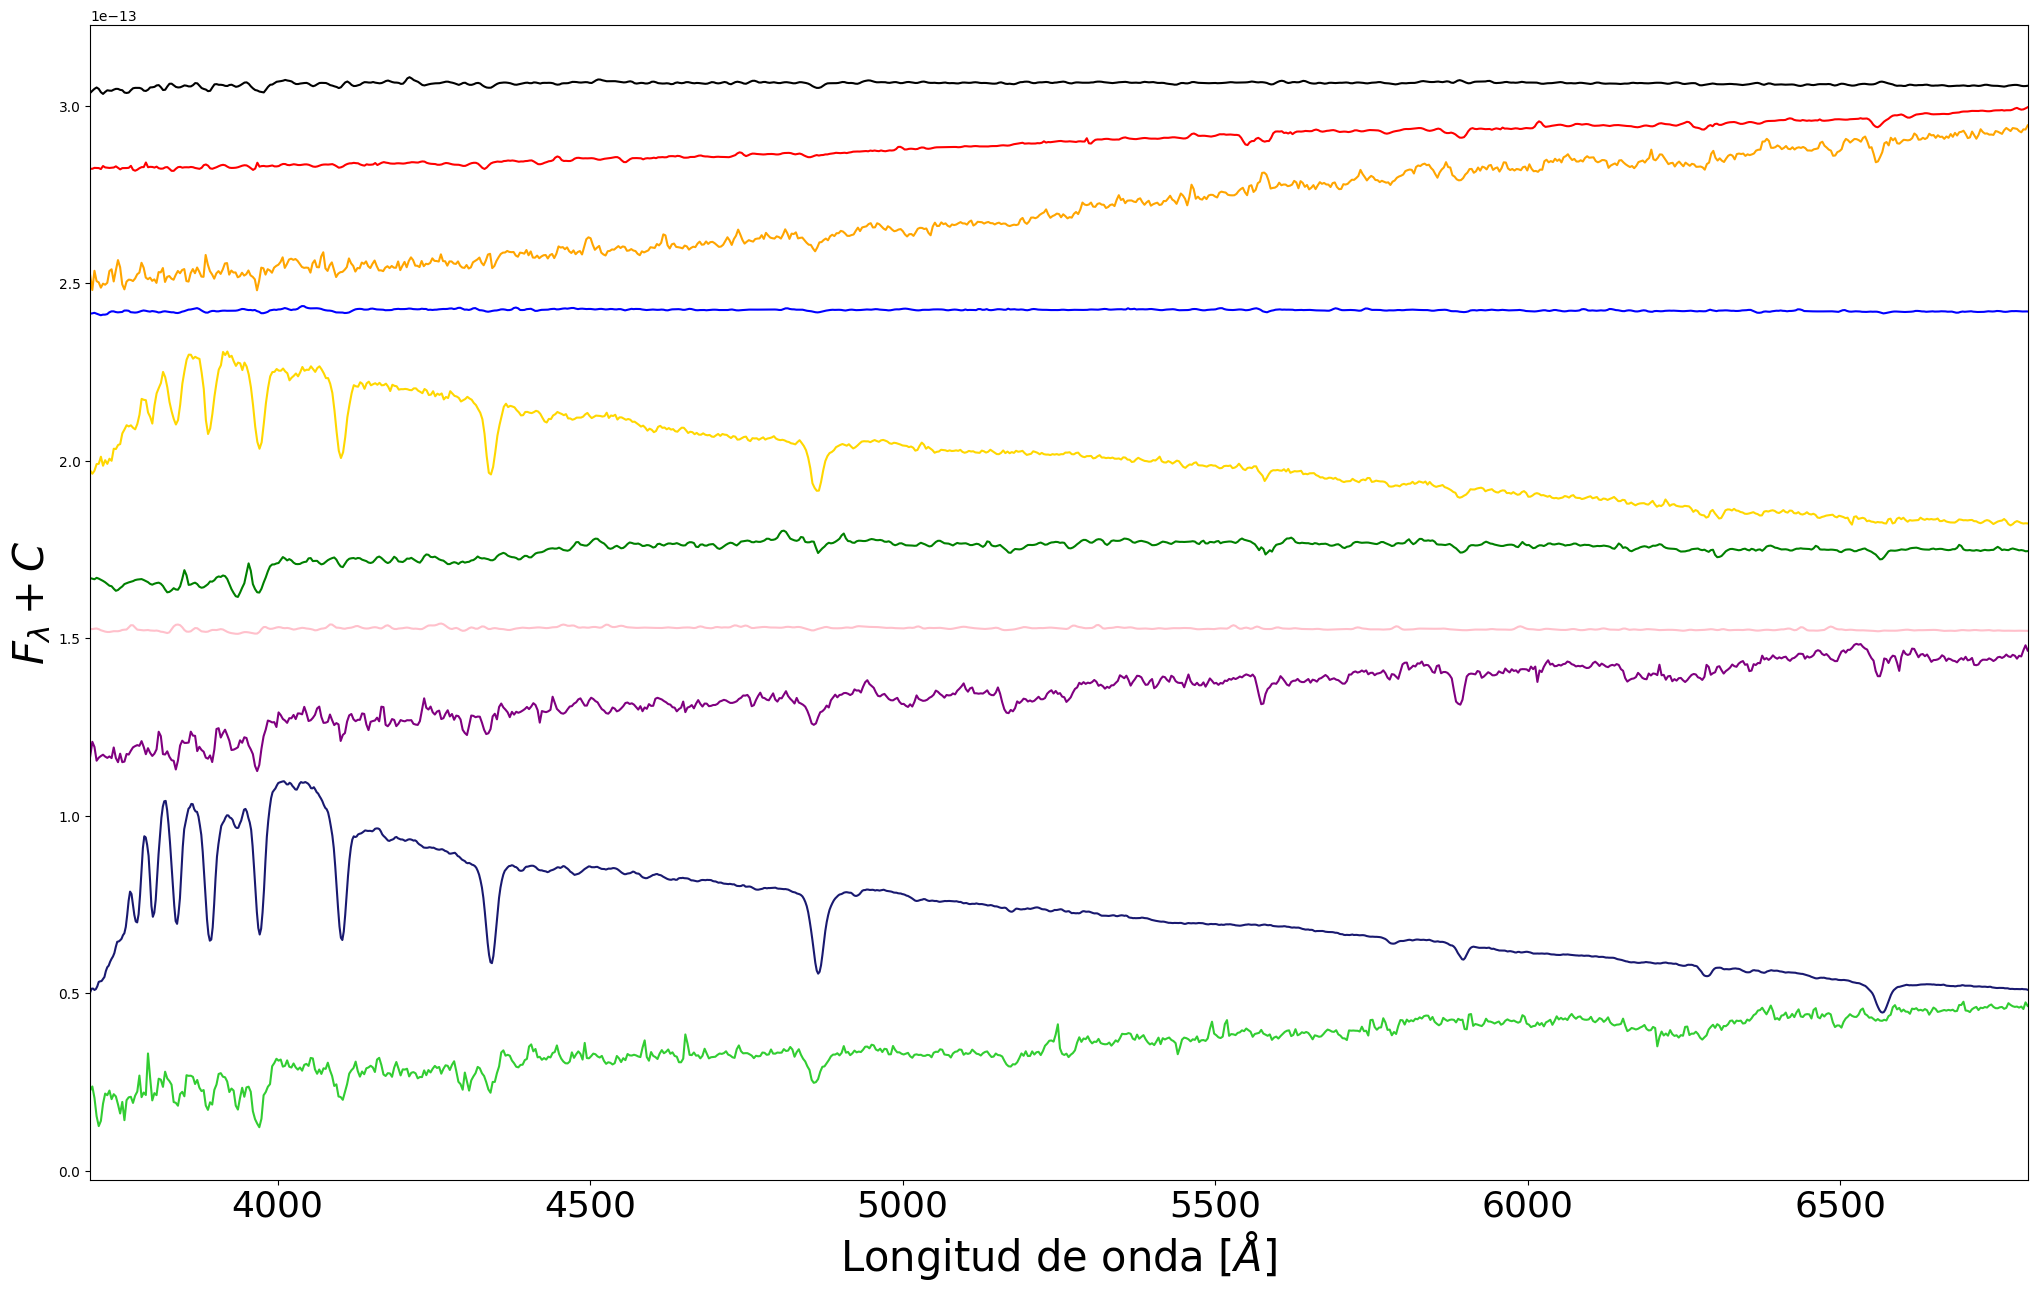

In [58]:

#Se grafican los espectros

#plt.title('Espectros finales')
#plt.style.use('dark_background')
plt.figure(figsize=(25,15), facecolor= 'white')
ax = plt.axes()
ax.set_facecolor('white')
ax.tick_params(axis= 'x', colors='black')
ax.tick_params(axis= 'y', colors='black')


plt.ylabel('$F_{\lambda} + C$', color= 'black',fontsize=30)
plt.xlabel('Longitud de onda $[{\AA}]$', color='black', fontsize=30)
plt.xlim(3700,6800)
#plt.yticks(range(-70,30,40))
plt.xticks(fontsize=26, color='black')
#plt.ylim()

plt.plot(x1,y1+3e-13, color= 'black', linewidth=1.5)
#plt.text(5235,37, 'L 41', color= 'black', fontsize=26)

plt.plot(x2,y2+2.8e-13, color= 'red', linewidth=1.5)
#plt.text(5160,32, 'NGC 1718', fontsize=26)

plt.plot(x3,y3+2.45e-13, color= 'orange', linewidth=1.5)
#plt.text(5160,27, 'NGC 1826', fontsize=26)

plt.plot(x4,y4+2.4e-13, color= 'blue', linewidth=1.5)
#plt.text(5160,22, 'NGC 1866', fontsize=26)

plt.plot(x5,y5+1.5e-13, color= 'gold', linewidth=1.5)
#plt.text(5160,17, 'NGC 1946', fontsize=26)

plt.plot(x6,y6+1.55e-13, color= 'green', linewidth=1.5)
#plt.text(5210,12, 'SL 573', fontsize=26)

plt.plot(x7,y7+1.5e-13, color= 'pink', linewidth=1.5)
#plt.text(5160,7, 'NGC 2100', fontsize=26)

plt.plot(x8,y8+1e-13, color= 'purple', linewidth=1.5)
#plt.text(5160,2, 'NGC 2109', fontsize=26)

plt.plot(x9,y9+1e-14, color= 'midnightblue', linewidth=1.5)
#plt.text(5160,-3, 'NGC 2140', fontsize=26)

plt.plot(x10,y10-1e-14, color= 'limegreen', linewidth=1.5)
#plt.text(5160,-8, 'NGC 2145', fontsize=26)


#plt.scatter(LBx,LBy, color= 'black', marker= '|')

#plt.text(4070,-16, 'H$\delta$', fontsize=24)
#plt.text(4315,-16, 'H$\gamma$', fontsize=24)
#plt.text(4825,-16, r'H$\beta$', fontsize=24)
#plt.text(6535,-16, r'H$\alpha$', fontsize=24)

#plt.savefig('EspectrosNEW.jpg'


plt.show()


In [ ]:
#Ahora hago el plot de FISA

In [ ]:
# Se importan los datos

template = np.genfromtxt('NGC2145tem.dat')
epdesred = np.genfromtxt('NGC2145unred.dat')
observado = np.genfromtxt('NGC2145spec.dat')
flujoresid = np.genfromtxt('NGC2145redflu.dat')
cero =  np.genfromtxt('cero.dat')

In [ ]:
tx = template[:,0]
ty = template[:,1]


edrx = epdesred[:,0]
edry = epdesred[:,1]

obsx = observado[:,0]
obsy = observado[:,1]


frsx = flujoresid[:,0]
frsy = flujoresid[:,1]

cx = cero[:,0]
cy = cero[:,1]


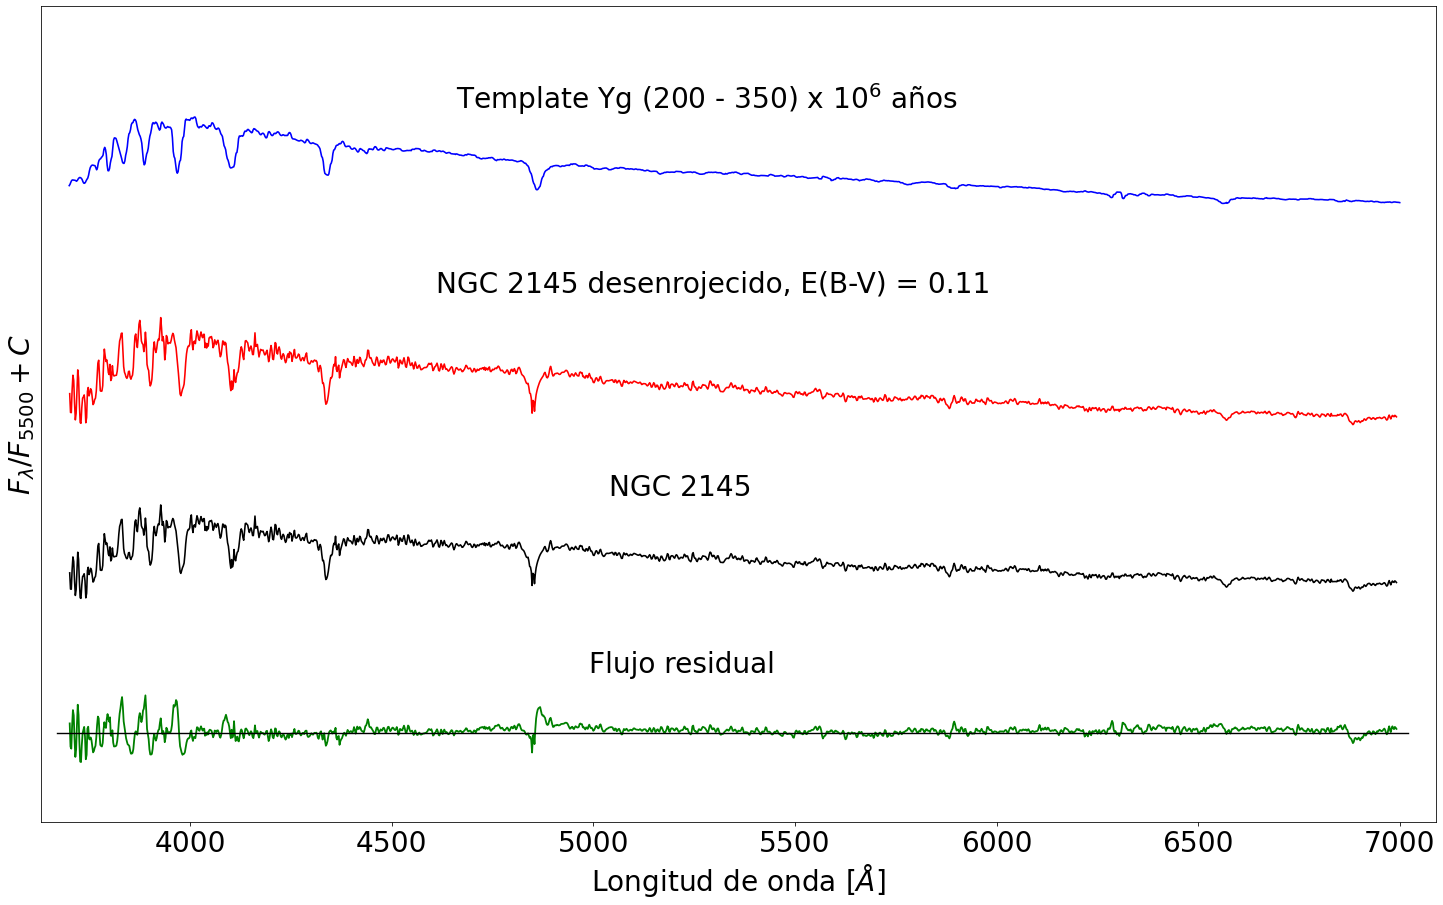

In [ ]:
#Se grafican los espectros

plt.figure(figsize=(25,15), facecolor= 'white')
ax = plt.axes()
ax.set_facecolor('white')
ax.tick_params(axis= 'x', colors='black')
ax.tick_params(axis= 'y', colors='black')
plt.ylabel('$F_{\lambda}/F_{5500} + C$', color= 'black',fontsize=28)
plt.xlabel('Longitud de onda $[{\AA}]$', color='black', fontsize=28)
plt.xlim(3630,7090)
plt.ylim(-1.3,10.7)
plt.yticks(range(-2,6,8))
#plt.yticks(range(-1.1,6,4))
plt.xticks(fontsize=28, color='black')


plt.plot(tx,ty+5.2, color= 'blue', linewidth=1.6)
plt.text(4660,9.2, 'Template Yg (200 - 350) x $10^{6}$ años', color= 'black', fontsize=28)

plt.plot(edrx,edry+3., color= 'red', linewidth=1.6)
plt.text(4610,6.5, 'NGC 2145 desenrojecido, E(B-V) = 0.11', fontsize=28)

plt.plot(obsx,obsy+1.5, color= 'black', linewidth=1.6)
plt.text(5040,3.5, 'NGC 2145', fontsize=28)

plt.plot(frsx,frsy, color= 'green', linewidth=1.8)
plt.text(4990,0.9, 'Flujo residual', fontsize=28)

#plt.plot(cx,cy, color= 'black', linewidth=1.4)

plt.savefig('NEWtemplates-1.png')
plt.show()



In [ ]:
# Se importan los datos

temp = np.genfromtxt('NGC2109tem.dat')
eunred = np.genfromtxt('NGC2109unred.dat')
obs = np.genfromtxt('NGC2109spec.dat')
fresid = np.genfromtxt('NGC2109redflu.dat')
cero =  np.genfromtxt('cero.dat')

In [ ]:
tx1 = temp[:,0]
ty1 = temp[:,1]

edrx1 = eunred[:,0]
edry1 = eunred[:,1]

obsx1 = obs[:,0]
obsy1 = obs[:,1]

frsx1 = fresid[:,0]
frsy1 = fresid[:,1]

cx1 = cero[:,0]
cy1 = cero[:,1]


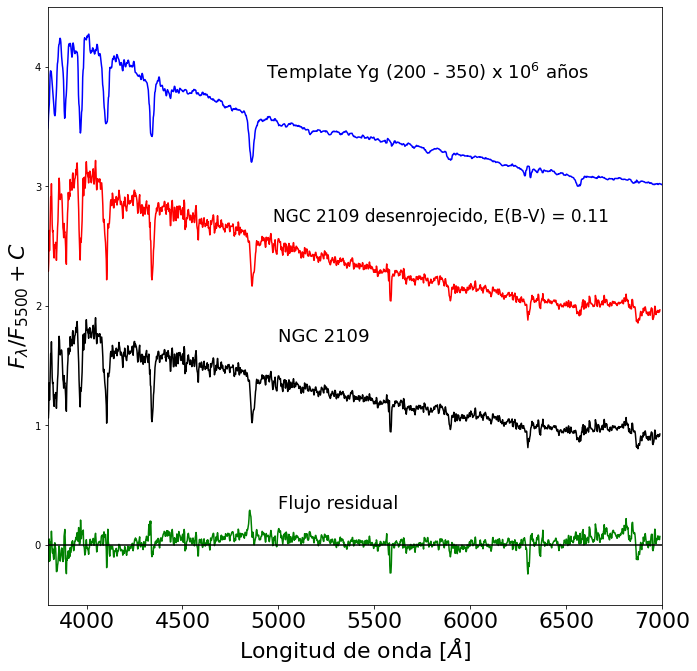

In [ ]:
#Se grafican los espectros

plt.figure(figsize=(11,11), facecolor= 'white')
ax = plt.axes()
ax.set_facecolor('white')
ax.tick_params(axis= 'x', colors='black')
ax.tick_params(axis= 'y', colors='black')
plt.ylabel('$F_{\lambda}/F_{5500} + C$', color= 'black',fontsize=22)
plt.xlabel('Longitud de onda $[{\AA}]$', color='black', fontsize=22)
plt.xlim(3800,7000)
plt.ylim(-0.5,4.5)
#plt.yticks(range(-0.6,0.5,5))
plt.xticks(fontsize=22, color='black')


plt.plot(tx1,ty1+0.4, color= 'blue', linewidth=1.5)
plt.text(4935,3.9, 'Template Yg (200 - 350) x $10^{6}$ años', color= 'black', fontsize=18)

plt.plot(edrx1,edry1+0.3, color= 'red', linewidth=1.5)
plt.text(4970,2.7, 'NGC 2109 desenrojecido, E(B-V) = 0.11', fontsize=17)

plt.plot(obsx1,obsy1+0.2, color= 'black', linewidth=1.5)
plt.text(5000,1.7, 'NGC 2109', fontsize=18)

plt.plot(frsx1,frsy1, color= 'green', linewidth=1.5)
plt.text(5000,0.3, 'Flujo residual', fontsize=18)

plt.plot(cx1,cy1, color= 'black', linewidth=1.5)

plt.savefig('NGC2109-FISA-BAAA.png')
plt.show()

#faltan las líneas de Balmer de señalar

In [ ]:
#Hago graf- desenrrojecido

In [ ]:
N1866 = np.genfromtxt('NGC1866unred.dat')
N2109 = np.genfromtxt('NGC2109unred.dat')
N2145 = np.genfromtxt('NGC2145unred.dat')
N2100 = np.genfromtxt('NGC2100unred.dat')
N1826 = np.genfromtxt('NGC1826unred.dat')
L41   = np.genfromtxt('L41unred.dat')
N2140 = np.genfromtxt('NGC2140.dat')
N1946 = np.genfromtxt('N1946unred.dat')
S573 = np.genfromtxt('SL573unred.dat')
N1718 = np.genfromtxt('N1718-Ia-unred.dat')

In [ ]:
x1= N1866[:,0]
y1 = N1866[:,1]

x2 = N2109[:,0]
y2 = N2109[:,1]

x3 = N2145[:,0]
y3 = N2145[:,1]

x4 = N2100[:,0]
y4 = N2100[:,1]

x5 = N1826[:,0]
y5 = N1826[:,1]

x6 = L41[:,0]
y6 = L41[:,1]

x7 = N2140[:,0]
y7 = N2140[:,1]

x8= N1946[:,0]
y8 = N1946[:,1]

x9 = S573[:,0]
y9 = S573[:,1]

x10 = N1718[:,0]
y10 = N1718[:,1]

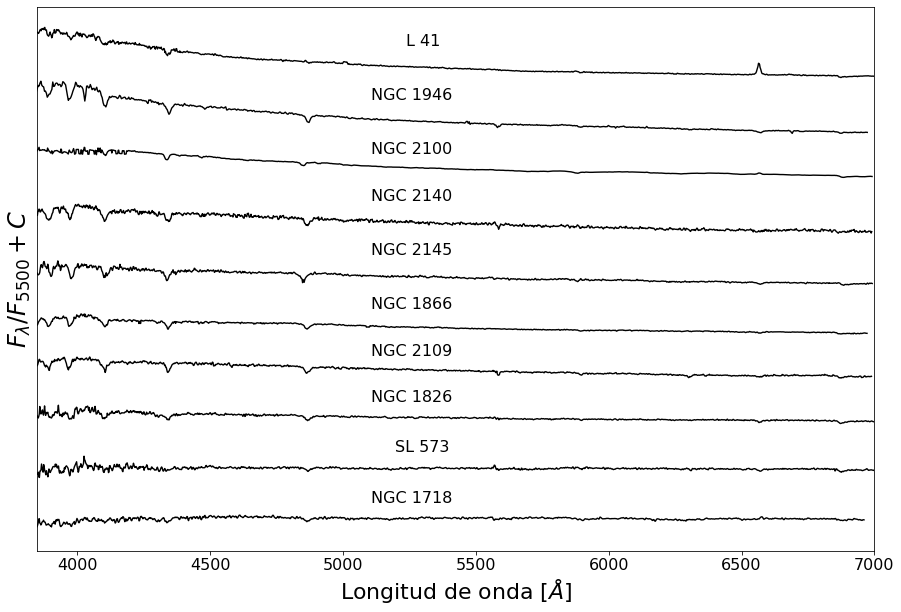

In [ ]:
#Se grafican los espectros

#plt.title('Espectros finales')
#plt.style.use('dark_background')
plt.figure(figsize=(15,10), facecolor= 'white')
ax = plt.axes()
ax.set_facecolor('white')
ax.tick_params(axis= 'x', colors='black')
ax.tick_params(axis= 'y', colors='black')


plt.ylabel('$F_{\lambda}/F_{5500} + C$', color= 'black',fontsize=24)
plt.xlabel('Longitud de onda $[{\AA}]$', color='black', fontsize=22)
plt.xlim(3850,7000)
plt.yticks(range(-1,20,40))
plt.xticks(fontsize=16, color='black')
plt.ylim(-0.1,35)

plt.plot(x6,y6+29, color= 'black', linewidth=1.4)
plt.text(5238,32.5, 'L 41', fontsize=16)

plt.plot(x8,y8+25.5, color= 'black', linewidth=1.4)
plt.text(5105,29, 'NGC 1946', color= 'black', fontsize=16)

plt.plot(x4,y4+22.5, color= 'black', linewidth=1.4)
plt.text(5105,25.5, 'NGC 2100', fontsize=16)

plt.plot(x7,y7+20, color= 'black', linewidth=1.4)
plt.text(5105,22.5, 'NGC 2140', fontsize=16)

plt.plot(x3,y3+15.5, color= 'black', linewidth=1.4)
plt.text(5105,19, 'NGC 2145', fontsize=16)

plt.plot(x1,y1+12.5, color= 'black', linewidth=1.4)
plt.text(5105,15.5, 'NGC 1866', fontsize=16)

plt.plot(x2,y2+9.5, color= 'black', linewidth=1.4)
plt.text(5105,12.5, 'NGC 2109', fontsize=16)

plt.plot(x5,y5+6.5, color= 'black', linewidth=1.4)
plt.text(5105,9.5, 'NGC 1826', fontsize=16)

plt.plot(x9,y9+3.2, color= 'black', linewidth=1.4)
plt.text(5195,6.3, 'SL 573', fontsize=16)

plt.plot(x10,y10, color= 'black', linewidth=1.4)
plt.text(5105,3, 'NGC 1718', fontsize=16)



#plt.scatter(LBx,LBy, color= 'black', marker= '|')

#plt.text(4070,-1.6, 'H$\delta$', fontsize=20)
#plt.text(4315,-1.6, 'H$\gamma$', fontsize=20)
#plt.text(4825,-1.6, r'H$\beta$', fontsize=20)
#plt.text(6535,-1.6, r'H$\alpha$', fontsize=20)

plt.savefig('Esp-unred-BAAA.jpg')


plt.show()
